# Relação de Poisson

Este código utiliza a biblioteca de modelagem e inversão de dados geofísicos denominada [Fatiando a Terra](http://www.fatiando.org/index.html).

### Coisas para importar

In [1]:
%matplotlib inline
import numpy as np
from fatiando import mesher, gridder, utils
from fatiando.gravmag import prism
from fatiando.vis import mpl
from fatiando.constants import G, CM

### Modelo de corpo esférico

In [2]:
inc = -30.0
dec = -23.0
m = 10.

In [3]:
mag = utils.ang2vec(1.0, inc, dec) # intensidade (A/m), inclinacao (graus), declinacao (graus)
rho = 2000. # kg/m³

model = [mesher.Prism(-500., 500., -500., 500., 10., 1010., 
                       {'magnetization': m*mag, 'density': rho})]

### Pontos onde são calculados os dados

In [4]:
shape = (100, 100) # número de pontos ao longo de x e y
area = (-5000, 5000, -5000, 5000) # x mínimo, x máximo, y mínimo e y máximo da área
xp, yp, zp = gridder.regular(area, shape, z=-100) # grade regular localizada em z = -100 m

### Componentes do tensor gradiente (em Eötvös)

In [5]:
gxx = prism.gxx(xp, yp, zp, model)
gxy = prism.gxy(xp, yp, zp, model)
gxz = prism.gxz(xp, yp, zp, model)
gyy = prism.gyy(xp, yp, zp, model)
gyz = prism.gyz(xp, yp, zp, model)
gzz = prism.gzz(xp, yp, zp, model)

### Componentes da indução magnética verdadeira (em nT)

In [6]:
bx = prism.bx(xp, yp, zp, model)
by = prism.by(xp, yp, zp, model)
bz = prism.bz(xp, yp, zp, model)

### Componentes da indução magnética calculada (em nT)

In [7]:
cte_poisson = (CM*m)/(G*rho)

bx_calc = cte_poisson*(gxx*mag[0] + gxy*mag[1] + gxz*mag[2])
by_calc = cte_poisson*(gxy*mag[0] + gyy*mag[1] + gyz*mag[2])
bz_calc = cte_poisson*(gxz*mag[0] + gyz*mag[1] + gzz*mag[2])

### Figuras

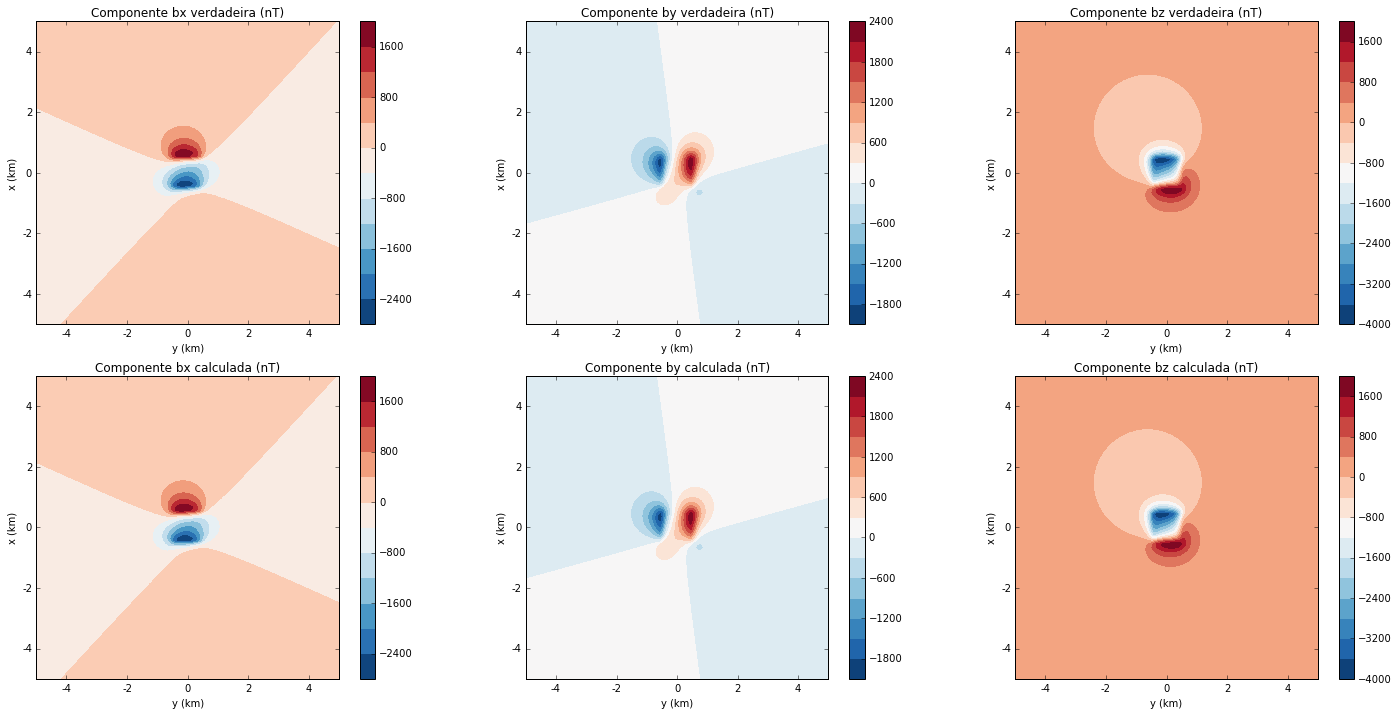

In [8]:
mpl.close('all')
mpl.figure(figsize=(20,10))

mpl.subplot(2,3,1)
mpl.title("Componente bx verdadeira (nT)")
mpl.axis('scaled')
mpl.contourf(yp, xp, bx, shape, 15, cmap=mpl.get_cmap('RdBu_r'))
mpl.colorbar()
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')
mpl.m2km()

mpl.subplot(2,3,2)
mpl.title("Componente by verdadeira (nT)")
mpl.axis('scaled')
mpl.contourf(yp, xp, by, shape, 15, cmap=mpl.get_cmap('RdBu_r'))
mpl.colorbar()
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')
mpl.m2km()

mpl.subplot(2,3,3)
mpl.title("Componente bz verdadeira (nT)")
mpl.axis('scaled')
mpl.contourf(yp, xp, bz, shape, 15, cmap=mpl.get_cmap('RdBu_r'))
mpl.colorbar()
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')
mpl.m2km()

mpl.subplot(2,3,4)
mpl.title("Componente bx calculada (nT)")
mpl.axis('scaled')
mpl.contourf(yp, xp, bx_calc, shape, 15, cmap=mpl.get_cmap('RdBu_r'))
mpl.colorbar()
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')
mpl.m2km()

mpl.subplot(2,3,5)
mpl.title("Componente by calculada (nT)")
mpl.axis('scaled')
mpl.contourf(yp, xp, by_calc, shape, 15, cmap=mpl.get_cmap('RdBu_r'))
mpl.colorbar()
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')
mpl.m2km()

mpl.subplot(2,3,6)
mpl.title("Componente bz calculada (nT)")
mpl.axis('scaled')
mpl.contourf(yp, xp, bz_calc, shape, 15, cmap=mpl.get_cmap('RdBu_r'))
mpl.colorbar()
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')
mpl.m2km()

mpl.tight_layout(w_pad=5.0)

mpl.show()

In [9]:
gxx_medio = np.mean(gxx)
gxy_medio = np.mean(gxy)
gxz_medio = np.mean(gxz)
gyy_medio = np.mean(gyy)
gyz_medio = np.mean(gyz)
gzz_medio = np.mean(gzz)

bx_medio = np.mean(bx)
by_medio = np.mean(by)
bz_medio = np.mean(bz)

In [10]:
print 'medias:'
print 'gxx: %15.5e' % gxx_medio
print 'gxy: %15.5e' % gxy_medio
print 'gxz: %15.5e' % gxz_medio
print 'gyy: %15.5e' % gyy_medio
print 'gyz: %15.5e' % gyz_medio
print 'gzz: %15.5e' % gzz_medio
print 'bx : %15.5e' % bx_medio
print 'by : %15.5e' % by_medio
print 'bz : %15.5e' % bz_medio

medias:
gxx:    -7.19515e-01
gxy:    -4.61853e-16
gxz:     7.50333e-16
gyy:    -7.19515e-01
gyz:     1.05400e-15
gzz:     1.43903e+00
bx :    -4.29779e+00
by :     1.82431e+00
bz :    -5.39124e+00
